# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [2]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True
meas

In [3]:
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'opt_pv_info', 'save_scalar_pvs', 'savepaths'])

In [4]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-06-03 13:29:55,497 | INFO : Running online!
2023-06-03 13:29:55,527 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-06-03 13:29:55,555 | INFO : Settling for 1 s...
2023-06-03 13:29:56,784 | INFO : 2023-06-03_13-29-56-784578
2023-06-03 13:29:56,853 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-06-03 13:29:56,853 | INFO : Settling for 1 s...
2023-06-03 13:29:58,043 | INFO : 2023-06-03_13-29-58-043886
2023-06-03 13:29:58,095 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-06-03 13:29:58,096 | INFO : Settling for 1 s...
2023-06-03 13:29:59,278 | INFO : 2023-06-03_13-29-59-278366
2023-06-03 13:29:59,325 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-06-03 13:29:59,325 | INFO : Settling for 1 s...
2023-06-03 13:30:00,495 | INFO : 2023-06-03_13-30-00-495121
2023-06-03 13:30:00,543 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.7433359150700231
2023-06-03 13:30:00,543 | INFO : Settling for 1 s...
2023-06-03 13:30:01,737 | INFO : 2023-06-03_13-30-01-736992
2023-06-03 13:30:01,785 | INFO : EP

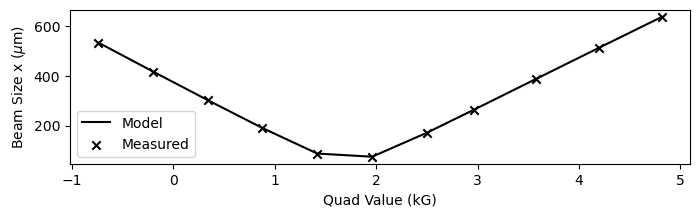

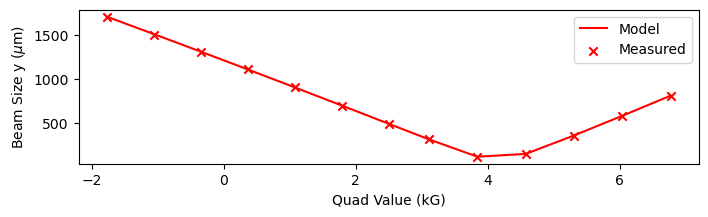

In [5]:
result = meas.measure_emittance()

# Examine results

In [6]:
import matplotlib.pyplot as plt

In [7]:
result

{'quadvalsx': array([-0.74333592, -0.20277993,  0.33777606,  0.87833204,  1.41888803,
         1.95944401,  2.5       ,  2.9633337 ,  3.58111197,  4.19889024,
         4.81666851]),
 'beamsizesx': array([5.32935496e-04, 4.16014826e-04, 3.03467528e-04, 1.90453876e-04,
        8.68794104e-05, 7.41385274e-05, 1.70357238e-04, 2.64666138e-04,
        3.88620101e-04, 5.13522078e-04, 6.39423542e-04]),
 'beamsizeserrx': array([0.03509371, 0.02377132, 0.01357057, 0.00615357, 0.00167202,
        0.00176467, 0.00588835, 0.00956848, 0.01957978, 0.02678038,
        0.03934009]),
 'error_x': False,
 'emit_x': 6.3765578054520974e-09,
 'norm_emit_x': 9.982686222556696e-07,
 'beta_x': 10.009649284043652,
 'alpha_x': -2.00242963727139,
 'emit_x_err': 1.936840266361129e-07,
 'norm_emit_x_err': 3.0321796229565337e-05,
 'beta_x_rel_err': 30.374385765076706,
 'alpha_x_rel_err': -1.7212036169874414e-15,
 'sigma_11': 6.382710727200655e-08,
 'sigma_12': 1.2768608333411493e-08,
 'sigma_22': 3.1914002831156944e-

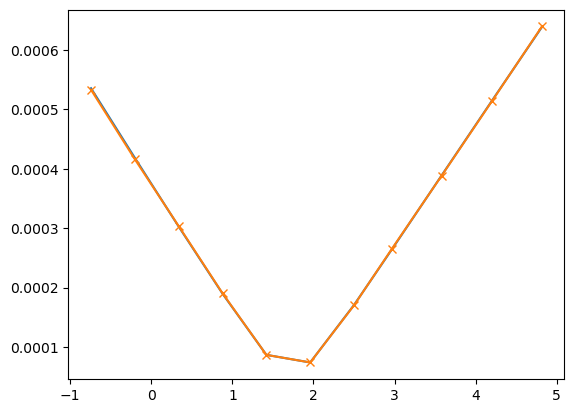

In [8]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

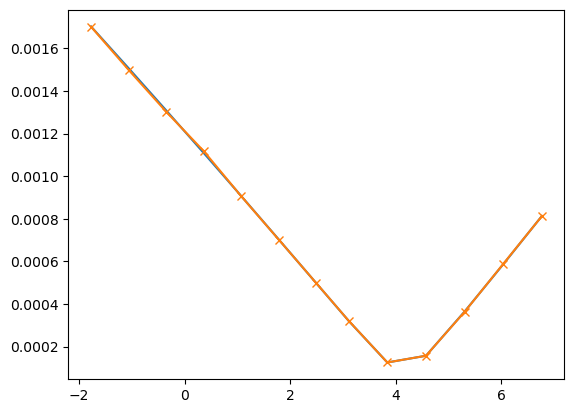

In [9]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


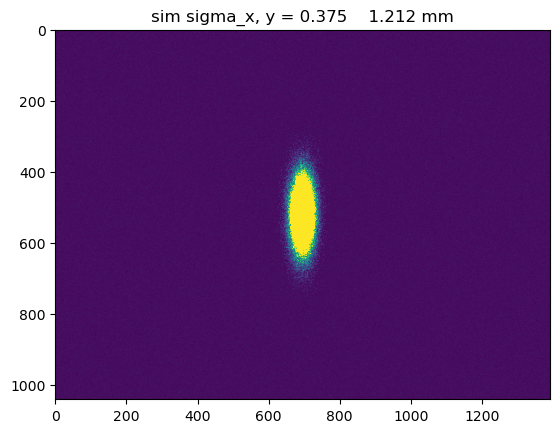

In [10]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)